<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: K-Nearest Neighbours (KNN): Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Predict wine quality based on the given physicochemical tests.

### b) Defining the Metric for Success

### c) Understanding the context

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [ ]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the Data from the source i.e. csv
# ---
url= 'http://bit.ly/WineQualityDatasetSource'
data=pd.read_csv('/content/drive/MyDrive/Dataset/red_wine.csv',sep=';')
#

In [ ]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5




## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The dataset has 12 columns and 1599 rows.11 columns are in float while one which is the target variable is in integer.

In [ ]:
columns = data.columns.tolist()
for name in range(len(columns)):
  columns[name] = columns[name].replace(" ", "_")

data.columns = columns
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# Previewing the top of our dataset
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Previewing the bottom of our dataset
data.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
# Checking whether each column has an appropriate datatype
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Every column is in the right data type.

## 5. Tidying the Dataset

In [ ]:
# Checking for Outliers
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


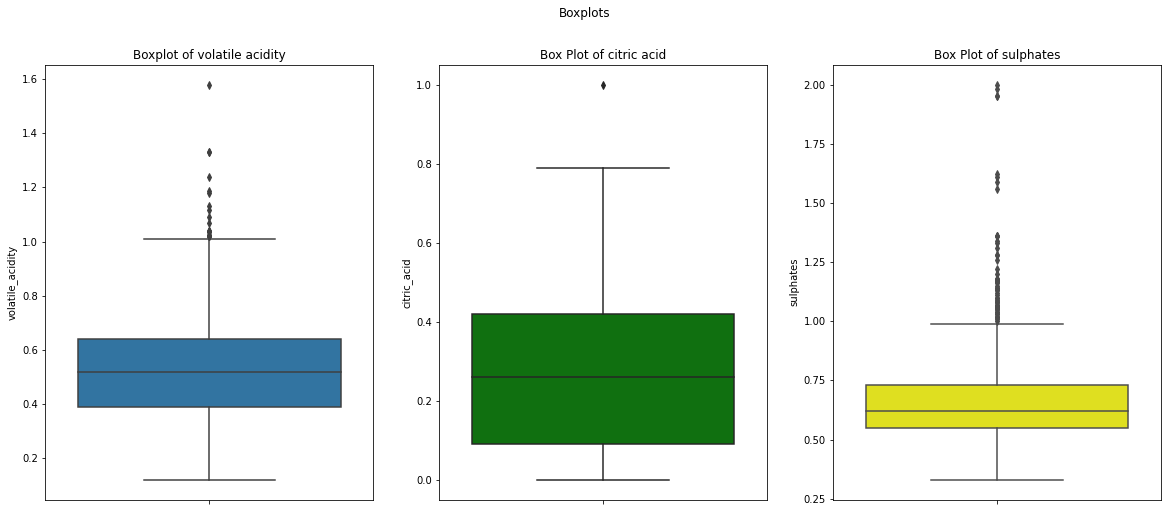

In [ ]:
#checking for outliers
fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=data, y = 'volatile_acidity', ax=ax[0])
ax[0].set_title('Boxplot of volatile acidity')
sns.boxplot(data=data, y = 'citric_acid', ax=ax[1], color = 'green')
ax[1].set_title('Box Plot of citric acid')
sns.boxplot(data=data, y = 'sulphates', ax=ax[2], color = 'yellow')
ax[2].set_title('Box Plot of sulphates')

plt.show()

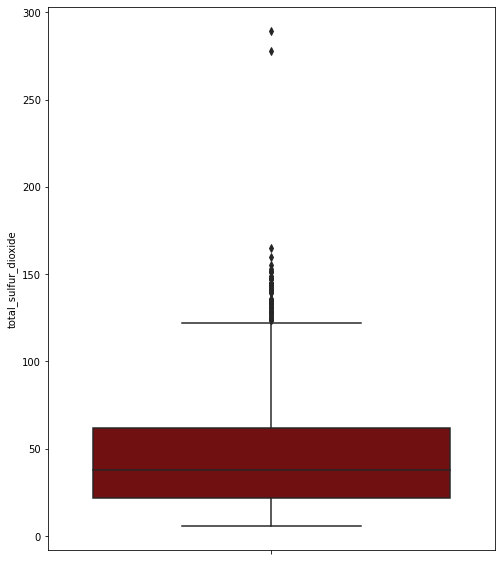

In [ ]:
fig = plt.figure(figsize=(8,10))
sns.boxplot(data=data, y = 'total_sulfur_dioxide',color='maroon')
plt.show()


From the above visualizations,the dataset has extreme high values which could affect the performance of our model.

In [ ]:
# Identifying the Missing Data
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The dataset does not have any null values.

In [ ]:
# More data cleaning procedures


## 6. Exploratory Analysis

**Bivariate Analysis**

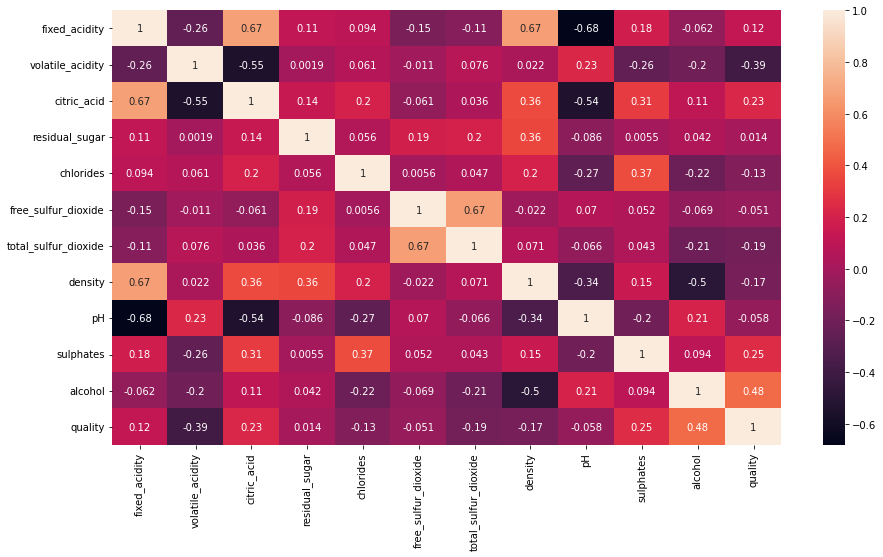

In [ ]:
# Plotting the Pearson correlation coefficient among the numeric variables in our dataset
#checking for correlation the target variable and the features
fig = plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

There is no multicolinearity since the featres are not strongly correlated.

**Data Reduction**

In [ ]:
# we first find our x and y kvariables
#we then split the data into train and test.We shall use 80% of the data for training

x=data.drop('quality',axis=1)
y=data['quality']

In [ ]:
#first,we import the library for splitting the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
#we then normalize our features using the standard scalar
#import the library
from sklearn.preprocessing import StandardScaler
#scalling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



**Dimensionality Reduction**

In [ ]:
#import LDA to use in reducing redudancy in the data

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#using the 1st components
lda = LDA(n_components=1)
X_train = lda.fit_transform(x_train, y_train)
X_test = lda.transform(x_test)

The next step is to find the optimal value for K to be used in the KNN algorithm.

In [ ]:
#import required packages
from sklearn import neighbors#the algorithm
from sklearn.metrics import mean_squared_error#accuracy metric
from math import sqrt
import matplotlib.pyplot as plt

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.862409415533017
RMSE value for k=  2 is: 0.792543374207368
RMSE value for k=  3 is: 0.7639898923124281
RMSE value for k=  4 is: 0.7368641326594747
RMSE value for k=  5 is: 0.7179832867135558
RMSE value for k=  6 is: 0.7039077433237335
RMSE value for k=  7 is: 0.6972522601510263
RMSE value for k=  8 is: 0.6883872116222091
RMSE value for k=  9 is: 0.6760337306216839
RMSE value for k=  10 is: 0.6682767016737903
RMSE value for k=  11 is: 0.6606564478976651
RMSE value for k=  12 is: 0.6562169303837125
RMSE value for k=  13 is: 0.6541006292124284
RMSE value for k=  14 is: 0.6481921483823218
RMSE value for k=  15 is: 0.6459919160140903
RMSE value for k=  16 is: 0.6438467008681104
RMSE value for k=  17 is: 0.643875861146754
RMSE value for k=  18 is: 0.6413073188109534
RMSE value for k=  19 is: 0.6386257102434363
RMSE value for k=  20 is: 0.6353702168814651


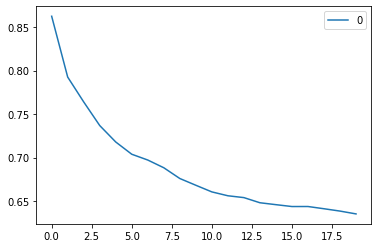

In [ ]:
#visualizing the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()
plt.show()

We wil use 7 as our value for k

## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
model1 = neighbors.KNeighborsRegressor(n_neighbors = 7)
model1.fit(X_train, y_train)
pred1=model.predict(X_test)
pred1


array([5.7 , 5.15, 6.8 , 5.15, 5.85, 5.05, 5.3 , 6.15, 5.  , 5.05, 5.4 ,
       5.4 , 5.3 , 5.45, 5.3 , 6.2 , 6.9 , 5.65, 6.05, 5.25, 6.4 , 5.05,
       5.8 , 6.3 , 5.6 , 5.25, 5.15, 6.35, 5.15, 6.2 , 5.8 , 5.55, 5.55,
       5.55, 6.1 , 6.15, 5.05, 5.55, 6.4 , 5.65, 5.35, 6.1 , 6.95, 6.8 ,
       5.9 , 5.1 , 5.5 , 5.9 , 5.35, 6.25, 5.45, 5.2 , 5.65, 6.2 , 5.7 ,
       4.85, 5.1 , 5.45, 6.7 , 5.5 , 5.  , 5.35, 6.05, 6.5 , 5.15, 6.2 ,
       5.15, 5.75, 6.3 , 5.9 , 5.35, 5.4 , 5.15, 5.45, 5.5 , 6.35, 5.05,
       5.15, 5.45, 6.35, 5.4 , 5.05, 5.85, 5.95, 5.45, 5.35, 6.35, 5.2 ,
       5.45, 5.05, 5.1 , 5.45, 5.95, 5.5 , 6.4 , 5.35, 6.55, 5.4 , 5.5 ,
       5.85, 6.85, 5.85, 5.65, 6.45, 5.4 , 5.1 , 5.4 , 5.35, 6.1 , 5.45,
       5.7 , 5.2 , 6.5 , 5.1 , 5.45, 5.65, 5.35, 6.3 , 5.8 , 5.8 , 5.15,
       6.15, 5.3 , 5.2 , 6.45, 6.3 , 4.95, 5.45, 5.8 , 6.4 , 5.45, 4.95,
       5.75, 6.15, 6.35, 5.1 , 6.15, 5.4 , 5.85, 5.45, 6.5 , 5.1 , 5.5 ,
       5.4 , 5.5 , 5.65, 6.5 , 6.45, 6.35, 4.95, 5.